In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz
!tar -x -z -f /tmp/data.tar.gz
!rm -f /tmp/data.tar.gz

In [3]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [4]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


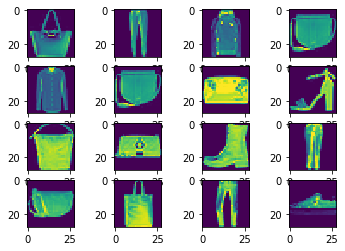

In [13]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

In [269]:
### I don't understand the difference between derive and prove, 
### so this is my best attempt at it:)
### Notice how I incrememnt sum after we converged? 
### Ye, I too am not sure if it's correct but uwu.

## 1.1 Deriving memory efficient algorithm
To obtain a version of the algorithm with memory efficiency O(1), it is necessary to store the sum of the product of weights and associated scales, and use it to make a prediction. In pseudocode, that would look as follows:<br> 
<b>Data:</b> $D$ := {(<b>x<sub>1</sub></b>, <i>y<sub>1</sub></i>), . . . ,(<b>x<sub>n</sub></b>, <i>y<sub>n</sub></i>)}<br> 
<b>Result:</b> $v$ := {(<b>w<sub>1</sub></b>, <i>c<sub>1</sub></i>), . . . ,(<b>w<sub>k</sub></b>, <i>c<sub>k</sub></i>)}<br>
<b>w</b> := 0<sup><i>d</i></sup>;<br>
<i>c</i> := 0;<br>
<b>sum</b> := 0<sup><i>d</i></sup>;<br>
<b>while</b> <i>not converged</i> <b>do</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>for</b> <i>i</i> := 1 . . . , <i>n</i> <b>do</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \begin{equation}
  \tilde{y}=\begin{cases}
    1, & \text{if $\mathbf{w}\cdot \mathbf{x_i}\geq 0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation} $<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>if</b> $\tilde{y}$ = y <b>then</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$c := c + 1;$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\mathbf{sum} := c\cdot\mathbf{w};$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\mathbf{w} := \mathbf{w} + (y − \tilde{y})\mathbf{x_i};$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$c := 1;$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;end<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;end<br>
end<br>
$\mathbf{sum} := \mathbf{sum} + c\cdot\mathbf{w};$<br>
<br>
Prediction then becomes<br>
$ \begin{equation}
  f(\mathbf{x})=\begin{cases}
    1, & \text{if $\mathbf{sum}\cdot \mathbf{x}\geq 0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation} $

## 1.2 Proving functional equivalence
Consider initial prediction formula,<br> $ \begin{equation}
  f(\mathbf{x})=\begin{cases}
    1, & \text{if $\sum_{i:=1}^{k}c_i(\mathbf{w_i}\cdot \mathbf{x})\geq 0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation} $<br>
We can rewrite the expression as follows:<br>
$\sum_{i:=1}^{k}c_i(\mathbf{w_i}\cdot \mathbf{x}) \\= c_1(\mathbf{w_1}\cdot \mathbf{x}) + c_2(\mathbf{w_2}\cdot \mathbf{x}) + ... + c_k(\mathbf{w_k}\cdot \mathbf{x}) \\= (c_1\mathbf{w_1})\cdot \mathbf{x} + (c_2\mathbf{w_2})\cdot \mathbf{x} + ... + (c_k\mathbf{w_k})\cdot \mathbf{x} \\= (c_1\mathbf{w_1} + c_2\mathbf{w_2} + ... + c_k\mathbf{w_k})\cdot\mathbf{x}$<br>
Hence, storing the sum of scaled weights is equivalent to storing each pair and using individual pairs to make a prediction.<br>
Upon misclassification and the end of training, the proposed algorithm uses the latest available scale and weight pair to add it to the sum vector, which is mathematically equivalent and results in the same outcome that would be obtained by the initial algorithm.

## 1.3 Efficient Version Implementation

In [47]:
### They kept talking about including a bias - 
### I don't understand why we need it (or how we would use it).
### I tried to look for pseudocode with a bias term and coudn't find it,
### so here's the solution without it.
### Note: cell below includes code for later parts of the task.

From the observed values, the lowest validation set loss over the first 100 epochs was around 0.52, hence it was decided to stop training when validation set loss is less than 0.53.

In [270]:
def efficient_voted_perceptron_no_bias(trainxs, trainys, devxs, devys):
#     define parameters for the algorithm
    w = np.zeros((trainxs.shape[1], trainxs.shape[2]))
    c = 1
#     s stores sum from pseudocode
    s = np.zeros((trainxs.shape[1], trainxs.shape[2]))
    
#     stores old accuracy and subsequent epochs count to detect convergence
    acc_old = accuracy(devxs, devys, s, w, c)
    row_epoch = 0
    
#     stores training set accuracy for part 1.5
    accuracy_training = []
    
#     stores validation set accuracy for part 1.6
    accuracy_validation = []
    
#     stores number of epochs to have a nice graph
    epoch = 0
        
    while True:
        for i in range (trainxs.shape[0]):
            yprime = 0
            if np.matmul(w.flatten(), trainxs[i].flatten()) >= 0:
                yprime = 1
            if yprime == trainys[i]:
                c += 1
            else:
                s += c * w
                c = 1
                w = w + (trainys[i] - yprime) * trainxs[i]

        acc = accuracy(trainxs, trainys, s, w, c)
        accuracy_training.append(acc)
        
        acc_valid = accuracy(devxs, devys, s, w, c)
        accuracy_validation.append(acc_valid)
        
        if np.abs(acc_valid - acc_old) == 0:
            row_epoch += 1
            if row_epoch == 3:
                break
        else:
            row_epoch = 0
        acc_old = acc_valid
        epoch += 1
    
    return s + c * w, epoch, accuracy_training, accuracy_validation

In [273]:
# function to calculate accuracy
def accuracy(devxs, devys, s, wlast, clast):
#     I'm changing s here cause in my head it has to change before prediction
    s += clast * wlast
    accuracy = 0.0
    for i in range (devxs.shape[0]):
        yp = predict_voted(s, devxs[i])
        if (yp == devys[i]):
            accuracy += 1
    return (accuracy / devys.shape[0]) * 100

In [274]:
def predict_voted(s, x):
    return np.matmul(s.flatten(), x.flatten()) >= 0

In [277]:
# DOES NOT WORK HERE
# sigmoid for a single sample
def sigmoid_no_bias(s, x):
    return 1 / (1 + np.exp(-(np.matmul(s.flatten(), x.flatten()))))

In [278]:
# DOES NOT WORK
# function to determine validation loss
def validation_loss_no_bias(devxs, devys, s, wlast, clast):
    s += clast * wlast
    loss = 0
    for i in range (devxs.shape[0]):
        py = sigmoid_no_bias(s, devxs[i])
        if (py == 0 and devys[i] == 1 or py == 1 and devys[i] == 0):
            py += 1e-15
        elif devys[i] == 1:
            loss += np.log(py)
        else:
            loss += np.log(1 - py)
#         print(loss)
#     return ((-1) / devys.shape[0]) * loss

## 1.4 Train model to convergence

In [279]:
s, epoch, accuracy_training, accuracy_validation = efficient_voted_perceptron_no_bias(trainxs, trainys, devxs, devys)

## 1.5 Accuracy plot for training set

For this task, we have to adjust our algorithm to store accuracy for each epoch.

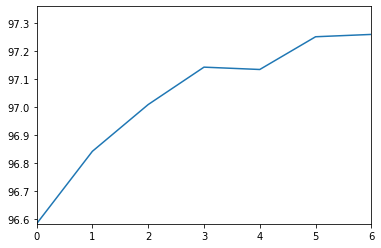

In [281]:
plt.axis([0, epoch, min(accuracy_training), max(accuracy_training) + 0.1])
plt.plot(accuracy_training)

## 1.6 Accuracy for best epoch

In [283]:
ind = accuracy_validation.index(max(accuracy_validation))

In [284]:
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 2
Accuracy on training set = 97.00833333333333
Accuracy on validation set = 97.8
